In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=False, num_workers=1)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

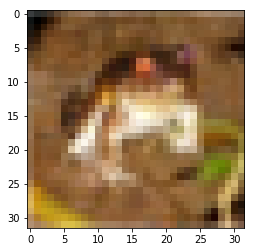

frog


In [15]:
# get some random training images
dataiter = iter(trainloader)
image, label = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(image))
# print labels
print(classes[label])

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
print(net) # show network architecture

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
# print(list(net.parameters())) # print all parameters
print(net.conv1.weight) # print the weight of one layer

Parameter containing:
tensor([[[[-0.0301,  0.0060, -0.0320,  0.0262, -0.0549],
          [ 0.0177, -0.0353, -0.0144, -0.0627,  0.0175],
          [-0.0631,  0.0238,  0.0491,  0.0210,  0.1054],
          [-0.0304, -0.0043, -0.0141, -0.0418,  0.0379],
          [-0.0335,  0.1044,  0.0790, -0.0786, -0.0771]],

         [[-0.0322,  0.0880, -0.0890, -0.0656,  0.0824],
          [-0.0258, -0.0863,  0.0691,  0.0699, -0.0044],
          [-0.0643,  0.0678, -0.0304,  0.0733, -0.0054],
          [ 0.1054,  0.0296,  0.0126,  0.0612, -0.1062],
          [-0.0565,  0.0811,  0.0457,  0.0927, -0.0311]],

         [[ 0.0436,  0.0341, -0.0226,  0.1134,  0.0790],
          [ 0.0993, -0.0719,  0.0210, -0.0180,  0.0137],
          [-0.0606,  0.0788, -0.0950,  0.0932,  0.0376],
          [ 0.0090, -0.0347, -0.0051,  0.0551, -0.0575],
          [ 0.0991,  0.0740, -0.0877,  0.0468, -0.0628]]],


        [[[-0.0290,  0.0017, -0.0923,  0.0888, -0.0633],
          [-0.0144, -0.0518,  0.0198, -0.0585,  0.0675],
 

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
optimizer.zero_grad()
print(net.conv1.weight.grad) # print grad

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0

In [21]:
# zero the parameter gradients
optimizer.zero_grad()

# get one training image
dataiter = iter(trainloader)
image, label = dataiter.next()

# forward + backward + optimize
output = net(image)
loss = criterion(output, label)
loss.backward()
optimizer.step()

In [22]:
print(net.conv1.weight.grad)

tensor([[[[ 0.0073,  0.0047,  0.0033,  0.0045,  0.0036],
          [ 0.0045,  0.0021,  0.0011,  0.0021,  0.0034],
          [ 0.0004, -0.0010,  0.0012,  0.0017,  0.0043],
          [-0.0026, -0.0018,  0.0017,  0.0034,  0.0056],
          [-0.0031, -0.0038, -0.0001,  0.0028,  0.0025]],

         [[ 0.0117,  0.0081,  0.0053,  0.0056,  0.0049],
          [ 0.0079,  0.0047,  0.0037,  0.0043,  0.0056],
          [ 0.0017,  0.0002,  0.0034,  0.0046,  0.0075],
          [-0.0023, -0.0018,  0.0027,  0.0058,  0.0086],
          [-0.0022, -0.0036,  0.0006,  0.0047,  0.0047]],

         [[ 0.0124,  0.0086,  0.0052,  0.0052,  0.0039],
          [ 0.0103,  0.0063,  0.0041,  0.0037,  0.0049],
          [ 0.0037,  0.0014,  0.0041,  0.0050,  0.0084],
          [-0.0016, -0.0016,  0.0033,  0.0080,  0.0119],
          [-0.0008, -0.0029,  0.0018,  0.0078,  0.0088]]],


        [[[ 0.0007,  0.0011,  0.0006, -0.0093, -0.0110],
          [-0.0030, -0.0049, -0.0042, -0.0055, -0.0041],
          [-0.0008, -0.